In [26]:
import pandas as pd
import numpy as np
from copy import deepcopy

In [84]:
#loading initial dataset
dataset = pd.read_csv('03april2018_full.csv')
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset = dataset.set_index('timestamp')
dataset = dataset[['id_wasp','sensor','value']]

In [85]:
#taking mean from 4 sensors
measures = np.array(data['frame_type'])>0
data_lib = data.iloc[measures,:]
data_lib = data_lib[data_lib['value'].str.contains('Start') == False]
data_lib['value'] = data_lib['value'].astype(float)
data_lib = pd.pivot_table(data_lib, values='value',index='timestamp', columns='sensor', aggfunc='mean')
data_lib.index = pd.to_datetime(data_lib.index)
data_lib = data_lib.drop_duplicates()
arr = np.array(data_lib.index, dtype='datetime64[s]').view('i8')
dates = np.mean(arr.reshape(-1, 4), axis=1).astype('datetime64[s]')
meas = data_lib.groupby(np.arange(len(data_lib))//4).mean()
meas['timestamp'] = dates
data_lib = meas.set_index(['timestamp'])
data_lib = data_lib.drop(columns=['BAT'])

In [86]:
#reprocessing whole dataset
dataset = pd.pivot_table(dataset, values='value',index='timestamp', columns='sensor', aggfunc='first')
dataset.fillna(value=np.nan, inplace=True)
cols_float = ['BAT', 'CO2', 'HUM', 'PRES', 'TC', 'air_cond_HC', 
              'air_cond_state', 'air_in_val1_PV', 'air_in_val1_SP',
              'air_in_val2_PV', 'air_in_val2_SP', 'air_out_val1_PV',
              'air_out_val1_SP', 'air_out_val2_PV', 'air_out_val2_SP',
              'people_number', 'radiator_HC_1', 'radiator_HC_2']
dataset[cols_float] = dataset[cols_float].astype(float)
cols_comma = ['PVT_air_in_H', 'PVT_air_in_T', 'PVT_air_out_H', 'PVT_air_out_T', 'air_in_speed']
for col in cols_comma:
    dataset[col] = dataset[col][pd.notnull(dataset[col])].apply(lambda x: x.replace(',','.'))
    dataset[col] = dataset[col].astype(float)
dataset['door_state'] = dataset['door_state'].replace(to_replace='CLOSE', value=1)
dataset['door_state'] = dataset['door_state'].replace(to_replace='OPEN', value=0)
cols_val = ['radiator_val1', 'radiator_val2', 'radiator_val3']
for col in cols_val:
    dataset[col] = dataset[col].replace(to_replace='FALSE', value=0) #closed
    dataset[col] = dataset[col].replace(to_replace='TRUE', value=1) #opened
dataset = dataset.drop(columns=['aaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaa', 'air_cond_HC',
                      'radiator_HC_1', 'radiator_HC_2', 'air_out_speed', 'BAT', 'STR',
                        'CO2', 'HUM', 'PRES', 'TC'])

In [88]:
dataset.dropna()

sensor,PVT_air_in_H,PVT_air_in_T,PVT_air_out_H,PVT_air_out_T,air_cond_state,air_in_speed,air_in_val1_PV,air_in_val1_SP,air_in_val2_PV,air_in_val2_SP,air_out_val1_PV,air_out_val1_SP,air_out_val2_PV,air_out_val2_SP,door_state,people_number,radiator_val1,radiator_val2,radiator_val3
timestamp,,,,,,,,,,,,,,,,,,,
2018-01-26 17:31:28,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:31:38,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:31:48,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:31:58,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:32:08,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:32:18,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:33:48,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:33:58,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0
2018-01-26 17:34:08,12.49,19.10,19.52,23.62,0.0,2.76,21.0,0.0,21.0,0.0,20.0,0.0,20.0,0.0,1.0,10.0,0.0,0.0,0.0


In [30]:
#merging datasets

dataset = data_lib.merge(dataset.dropna(), left_index=True, right_index=True, how='outer')
data_int = dataset.interpolate()
data_int = data_int.dropna()
data_int.index = pd.to_datetime(data_int.index)

## Let's try to learn something. CatBoost and SVM for people number prediction
People prediction was inaccurate so I decieded to predict temperature

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [52]:
features_cols = data_int.columns.tolist()[:-3]+data_int.columns.tolist()[-2:]
labels_cols = [data_int.columns.tolist()[-3]]
features_cols = data_int.columns.tolist()[:3]+data_int.columns.tolist()[4:]
labels_cols = [data_int.columns.tolist()[3]]
x_train, x_test, y_train, y_test = train_test_split(data_int.loc[:,features_cols], data_int.loc[:,labels_cols],
                                                                                    test_size=0.2, shuffle=False)
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()
x_train = scale_x.fit_transform(x_train)
y_train = np.ravel(scale_y.fit_transform(y_train))
x_test = scale_x.transform(x_test)
y_test = np.ravel(scale_y.transform(y_test))

In [53]:
cat = CatBoostRegressor()
cat.fit(x_train, y_train, verbose=False)

In [54]:
y_pred = cat.predict(x_test)

In [55]:
mean_squared_error(y_test[:5500], y_pred[:5500])

0.0075668616980621405

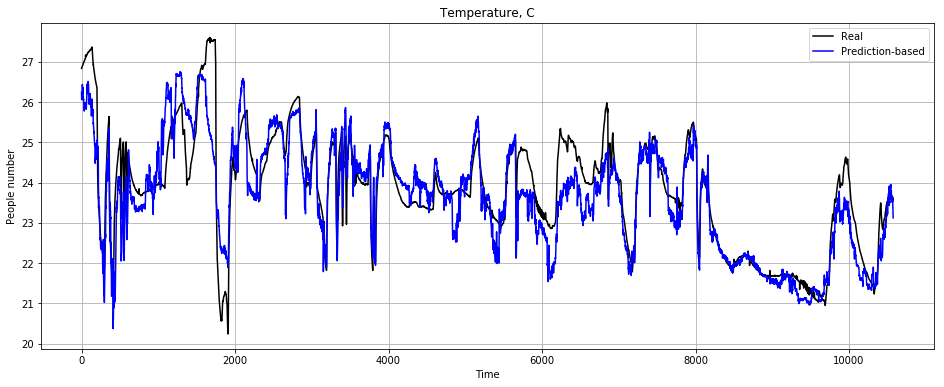

In [59]:
plt.figure(figsize=(16,6))
plt.plot(scale_y.inverse_transform(y_test.reshape(-1,1)), 'k', label='Real')
plt.plot(scale_y.inverse_transform(y_pred.reshape(-1,1)), 'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

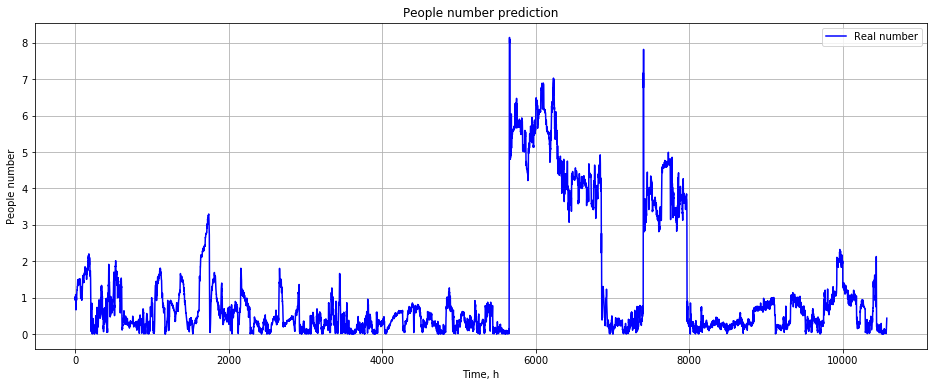

In [39]:
plt.figure(figsize=(16,6))
plt.plot(np.abs(np.array(y_test)[:50000]-y_pred[:50000].reshape(-1,1)), 'b', label='Real number')
plt.legend()
plt.title('People number prediction')
plt.xlabel('Time, h')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

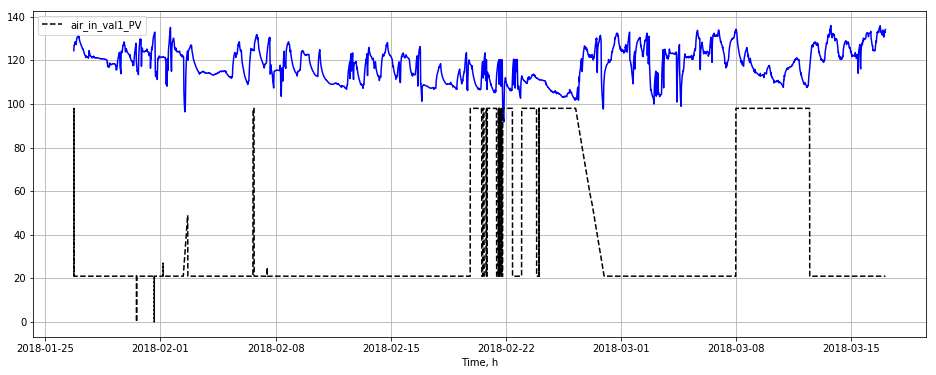

In [40]:
plt.figure(figsize=(16,6))
plt.plot(y_train*5, 'b')
plt.plot(x_train['air_in_val1_PV'], 'k--')
plt.legend()
#plt.title('People number prediction')
plt.xlabel('Time, h')
#plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

## Let's do CV

In [41]:
from sklearn.grid_search import GridSearchCV

/Users/malakhov_ad/py3sk/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/malakhov_ad/py3sk/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [42]:
cat_gs = CatBoostRegressor()

In [43]:
params = {'iterations': [50, 250, 1000], 'depth': [2, 7, 15]}
grid_search = GridSearchCV(cat_gs, params, cv=3, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0:	learn: 23.1279789	total: 5.66ms	remaining: 277ms
1:	learn: 22.4376407	total: 12.3ms	remaining: 296ms
2:	learn: 21.7671437	total: 17.8ms	remaining: 279ms
3:	learn: 21.1179009	total: 24ms	remaining: 276ms
4:	learn: 20.4870853	total: 29.5ms	remaining: 266ms
5:	learn: 19.8754719	total: 35.4ms	remaining: 260ms
6:	learn: 19.2824753	total: 41.2ms	remaining: 253ms
7:	learn: 18.7076051	total: 46.6ms	remaining: 245ms
8:	learn: 18.1486339	total: 52.1ms	remaining: 237ms
9:	learn: 17.6079224	total: 57.8ms	remaining: 231ms
10:	learn: 17.0830973	total: 63ms	remaining: 223ms
11:	learn: 16.5724580	total: 68.2ms	remaining: 216ms
12:	learn: 16.0774322	total: 73.6ms	remaining: 210ms
13:	learn: 15.5989286	total: 79.2ms	remaining: 204ms
14:	learn: 15.1333382	total: 87.1ms	remaining: 203ms
15:	learn: 14.6831198	total: 95.8ms	remaining: 204ms
16:	learn: 14.2465741	total: 103ms	remaining: 199ms
17:	learn: 13.8234508	total: 110ms	remaining: 195ms
18

17:	learn: 13.8253531	total: 217ms	remaining: 2.8s
18:	learn: 13.4142151	total: 229ms	remaining: 2.78s
19:	learn: 13.0164124	total: 241ms	remaining: 2.77s
20:	learn: 12.6302855	total: 253ms	remaining: 2.76s
21:	learn: 12.2553554	total: 259ms	remaining: 2.69s
22:	learn: 11.8923055	total: 265ms	remaining: 2.62s
23:	learn: 11.5385697	total: 271ms	remaining: 2.55s
24:	learn: 11.1946994	total: 276ms	remaining: 2.48s
25:	learn: 10.8631408	total: 281ms	remaining: 2.42s
26:	learn: 10.5418990	total: 288ms	remaining: 2.38s
27:	learn: 10.2298044	total: 294ms	remaining: 2.33s
28:	learn: 9.9256093	total: 299ms	remaining: 2.28s
29:	learn: 9.6328355	total: 304ms	remaining: 2.23s
30:	learn: 9.3490857	total: 310ms	remaining: 2.19s
31:	learn: 9.0733543	total: 315ms	remaining: 2.14s
32:	learn: 8.8063252	total: 321ms	remaining: 2.11s
33:	learn: 8.5480468	total: 326ms	remaining: 2.07s
34:	learn: 8.2976779	total: 332ms	remaining: 2.04s
35:	learn: 8.0547220	total: 338ms	remaining: 2.01s
36:	learn: 7.8190818	

177:	learn: 0.5423848	total: 1.43s	remaining: 579ms
178:	learn: 0.5406854	total: 1.44s	remaining: 571ms
179:	learn: 0.5390757	total: 1.44s	remaining: 562ms
180:	learn: 0.5371585	total: 1.45s	remaining: 553ms
181:	learn: 0.5353401	total: 1.46s	remaining: 544ms
182:	learn: 0.5338712	total: 1.46s	remaining: 535ms
183:	learn: 0.5321514	total: 1.47s	remaining: 526ms
184:	learn: 0.5306806	total: 1.47s	remaining: 517ms
185:	learn: 0.5292809	total: 1.48s	remaining: 508ms
186:	learn: 0.5275144	total: 1.48s	remaining: 499ms
187:	learn: 0.5262266	total: 1.49s	remaining: 490ms
188:	learn: 0.5250070	total: 1.49s	remaining: 482ms
189:	learn: 0.5235415	total: 1.5s	remaining: 473ms
190:	learn: 0.5220285	total: 1.5s	remaining: 465ms
191:	learn: 0.5208900	total: 1.51s	remaining: 457ms
192:	learn: 0.5194499	total: 1.52s	remaining: 448ms
193:	learn: 0.5180785	total: 1.52s	remaining: 440ms
194:	learn: 0.5163937	total: 1.53s	remaining: 431ms
195:	learn: 0.5147652	total: 1.53s	remaining: 423ms
196:	learn: 0.

105:	learn: 1.1710295	total: 601ms	remaining: 817ms
106:	learn: 1.1451852	total: 608ms	remaining: 812ms
107:	learn: 1.1203838	total: 616ms	remaining: 811ms
108:	learn: 1.0960914	total: 626ms	remaining: 810ms
109:	learn: 1.0733972	total: 634ms	remaining: 807ms
110:	learn: 1.0508684	total: 642ms	remaining: 804ms
111:	learn: 1.0299826	total: 648ms	remaining: 798ms
112:	learn: 1.0085997	total: 653ms	remaining: 791ms
113:	learn: 0.9888245	total: 659ms	remaining: 786ms
114:	learn: 0.9695693	total: 664ms	remaining: 779ms
115:	learn: 0.9511159	total: 669ms	remaining: 773ms
116:	learn: 0.9334041	total: 674ms	remaining: 766ms
117:	learn: 0.9162717	total: 680ms	remaining: 760ms
118:	learn: 0.8997324	total: 691ms	remaining: 761ms
119:	learn: 0.8846839	total: 701ms	remaining: 759ms
120:	learn: 0.8685460	total: 706ms	remaining: 753ms
121:	learn: 0.8538556	total: 712ms	remaining: 747ms
122:	learn: 0.8395569	total: 718ms	remaining: 741ms
123:	learn: 0.8258655	total: 723ms	remaining: 735ms
124:	learn: 

32:	learn: 8.8291801	total: 203ms	remaining: 1.33s
33:	learn: 8.5678201	total: 213ms	remaining: 1.35s
34:	learn: 8.3136444	total: 220ms	remaining: 1.35s
35:	learn: 8.0664362	total: 227ms	remaining: 1.35s
36:	learn: 7.8279848	total: 239ms	remaining: 1.38s
37:	learn: 7.5968651	total: 245ms	remaining: 1.37s
38:	learn: 7.3731211	total: 250ms	remaining: 1.35s
39:	learn: 7.1562090	total: 257ms	remaining: 1.35s
40:	learn: 6.9455193	total: 262ms	remaining: 1.34s
41:	learn: 6.7413347	total: 268ms	remaining: 1.32s
42:	learn: 6.5433885	total: 274ms	remaining: 1.32s
43:	learn: 6.3509877	total: 279ms	remaining: 1.31s
44:	learn: 6.1645461	total: 284ms	remaining: 1.29s
45:	learn: 5.9842502	total: 293ms	remaining: 1.3s
46:	learn: 5.8093217	total: 298ms	remaining: 1.29s
47:	learn: 5.6392655	total: 304ms	remaining: 1.28s
48:	learn: 5.4753325	total: 310ms	remaining: 1.27s
49:	learn: 5.3137285	total: 315ms	remaining: 1.26s
50:	learn: 5.1591413	total: 321ms	remaining: 1.25s
51:	learn: 5.0087085	total: 326m

194:	learn: 0.3889870	total: 1.21s	remaining: 341ms
195:	learn: 0.3879140	total: 1.22s	remaining: 336ms
196:	learn: 0.3868666	total: 1.23s	remaining: 330ms
197:	learn: 0.3856723	total: 1.23s	remaining: 324ms
198:	learn: 0.3846832	total: 1.24s	remaining: 317ms
199:	learn: 0.3840976	total: 1.24s	remaining: 311ms
200:	learn: 0.3834905	total: 1.25s	remaining: 305ms
201:	learn: 0.3820350	total: 1.25s	remaining: 298ms
202:	learn: 0.3808993	total: 1.26s	remaining: 292ms
203:	learn: 0.3800031	total: 1.27s	remaining: 286ms
204:	learn: 0.3787266	total: 1.27s	remaining: 279ms
205:	learn: 0.3777378	total: 1.28s	remaining: 273ms
206:	learn: 0.3764701	total: 1.28s	remaining: 267ms
207:	learn: 0.3759714	total: 1.29s	remaining: 260ms
208:	learn: 0.3749648	total: 1.29s	remaining: 254ms
209:	learn: 0.3737979	total: 1.3s	remaining: 247ms
210:	learn: 0.3729631	total: 1.3s	remaining: 241ms
211:	learn: 0.3721876	total: 1.31s	remaining: 235ms
212:	learn: 0.3710217	total: 1.31s	remaining: 228ms
213:	learn: 0.

131:	learn: 0.7488913	total: 794ms	remaining: 5.22s
132:	learn: 0.7397494	total: 802ms	remaining: 5.23s
133:	learn: 0.7315345	total: 807ms	remaining: 5.22s
134:	learn: 0.7232224	total: 816ms	remaining: 5.23s
135:	learn: 0.7151272	total: 825ms	remaining: 5.24s
136:	learn: 0.7075190	total: 831ms	remaining: 5.23s
137:	learn: 0.7001245	total: 836ms	remaining: 5.22s
138:	learn: 0.6928465	total: 841ms	remaining: 5.21s
139:	learn: 0.6860273	total: 846ms	remaining: 5.2s
140:	learn: 0.6791658	total: 852ms	remaining: 5.19s
141:	learn: 0.6727829	total: 857ms	remaining: 5.18s
142:	learn: 0.6666648	total: 863ms	remaining: 5.17s
143:	learn: 0.6605949	total: 869ms	remaining: 5.16s
144:	learn: 0.6552044	total: 874ms	remaining: 5.15s
145:	learn: 0.6499280	total: 880ms	remaining: 5.15s
146:	learn: 0.6443709	total: 885ms	remaining: 5.13s
147:	learn: 0.6395171	total: 892ms	remaining: 5.13s
148:	learn: 0.6348449	total: 897ms	remaining: 5.12s
149:	learn: 0.6302748	total: 902ms	remaining: 5.11s
150:	learn: 0

300:	learn: 0.4443604	total: 2.01s	remaining: 4.66s
301:	learn: 0.4440383	total: 2.01s	remaining: 4.65s
302:	learn: 0.4433598	total: 2.02s	remaining: 4.64s
303:	learn: 0.4429755	total: 2.02s	remaining: 4.64s
304:	learn: 0.4424109	total: 2.03s	remaining: 4.63s
305:	learn: 0.4420032	total: 2.04s	remaining: 4.62s
306:	learn: 0.4416078	total: 2.04s	remaining: 4.61s
307:	learn: 0.4411964	total: 2.05s	remaining: 4.6s
308:	learn: 0.4406062	total: 2.05s	remaining: 4.59s
309:	learn: 0.4397875	total: 2.06s	remaining: 4.58s
310:	learn: 0.4388201	total: 2.06s	remaining: 4.57s
311:	learn: 0.4385126	total: 2.07s	remaining: 4.56s
312:	learn: 0.4376700	total: 2.07s	remaining: 4.55s
313:	learn: 0.4370043	total: 2.08s	remaining: 4.54s
314:	learn: 0.4365720	total: 2.08s	remaining: 4.53s
315:	learn: 0.4362378	total: 2.09s	remaining: 4.53s
316:	learn: 0.4357831	total: 2.1s	remaining: 4.51s
317:	learn: 0.4354012	total: 2.1s	remaining: 4.5s
318:	learn: 0.4346813	total: 2.11s	remaining: 4.5s
319:	learn: 0.434

464:	learn: 0.3681622	total: 3.02s	remaining: 3.48s
465:	learn: 0.3676936	total: 3.03s	remaining: 3.48s
466:	learn: 0.3674592	total: 3.04s	remaining: 3.47s
467:	learn: 0.3672769	total: 3.04s	remaining: 3.46s
468:	learn: 0.3669552	total: 3.05s	remaining: 3.45s
469:	learn: 0.3666359	total: 3.06s	remaining: 3.44s
470:	learn: 0.3663123	total: 3.06s	remaining: 3.44s
471:	learn: 0.3659235	total: 3.07s	remaining: 3.43s
472:	learn: 0.3656470	total: 3.07s	remaining: 3.42s
473:	learn: 0.3653668	total: 3.08s	remaining: 3.42s
474:	learn: 0.3651546	total: 3.08s	remaining: 3.41s
475:	learn: 0.3649826	total: 3.09s	remaining: 3.4s
476:	learn: 0.3648564	total: 3.09s	remaining: 3.39s
477:	learn: 0.3643128	total: 3.1s	remaining: 3.38s
478:	learn: 0.3639407	total: 3.1s	remaining: 3.38s
479:	learn: 0.3637270	total: 3.11s	remaining: 3.37s
480:	learn: 0.3632596	total: 3.12s	remaining: 3.36s
481:	learn: 0.3629211	total: 3.12s	remaining: 3.35s
482:	learn: 0.3626505	total: 3.13s	remaining: 3.35s
483:	learn: 0.3

637:	learn: 0.3233126	total: 4.02s	remaining: 2.28s
638:	learn: 0.3232254	total: 4.03s	remaining: 2.27s
639:	learn: 0.3231346	total: 4.03s	remaining: 2.27s
640:	learn: 0.3228798	total: 4.04s	remaining: 2.26s
641:	learn: 0.3227688	total: 4.04s	remaining: 2.25s
642:	learn: 0.3226215	total: 4.05s	remaining: 2.25s
643:	learn: 0.3225089	total: 4.05s	remaining: 2.24s
644:	learn: 0.3223070	total: 4.06s	remaining: 2.23s
645:	learn: 0.3221373	total: 4.07s	remaining: 2.23s
646:	learn: 0.3217982	total: 4.07s	remaining: 2.22s
647:	learn: 0.3215831	total: 4.08s	remaining: 2.21s
648:	learn: 0.3215018	total: 4.08s	remaining: 2.21s
649:	learn: 0.3212604	total: 4.09s	remaining: 2.2s
650:	learn: 0.3210859	total: 4.09s	remaining: 2.19s
651:	learn: 0.3208294	total: 4.1s	remaining: 2.19s
652:	learn: 0.3207113	total: 4.1s	remaining: 2.18s
653:	learn: 0.3205820	total: 4.11s	remaining: 2.17s
654:	learn: 0.3203735	total: 4.12s	remaining: 2.17s
655:	learn: 0.3201263	total: 4.12s	remaining: 2.16s
656:	learn: 0.3

814:	learn: 0.2934315	total: 5s	remaining: 1.14s
815:	learn: 0.2933464	total: 5.01s	remaining: 1.13s
816:	learn: 0.2932285	total: 5.02s	remaining: 1.12s
817:	learn: 0.2930573	total: 5.02s	remaining: 1.12s
818:	learn: 0.2928409	total: 5.03s	remaining: 1.11s
819:	learn: 0.2927757	total: 5.04s	remaining: 1.1s
820:	learn: 0.2926146	total: 5.04s	remaining: 1.1s
821:	learn: 0.2924388	total: 5.05s	remaining: 1.09s
822:	learn: 0.2922623	total: 5.05s	remaining: 1.09s
823:	learn: 0.2921853	total: 5.06s	remaining: 1.08s
824:	learn: 0.2920498	total: 5.06s	remaining: 1.07s
825:	learn: 0.2919686	total: 5.07s	remaining: 1.07s
826:	learn: 0.2918841	total: 5.07s	remaining: 1.06s
827:	learn: 0.2917979	total: 5.08s	remaining: 1.05s
828:	learn: 0.2916508	total: 5.08s	remaining: 1.05s
829:	learn: 0.2915060	total: 5.09s	remaining: 1.04s
830:	learn: 0.2912975	total: 5.09s	remaining: 1.04s
831:	learn: 0.2911306	total: 5.1s	remaining: 1.03s
832:	learn: 0.2909373	total: 5.11s	remaining: 1.02s
833:	learn: 0.2907

972:	learn: 0.2743339	total: 5.99s	remaining: 166ms
973:	learn: 0.2742434	total: 6s	remaining: 160ms
974:	learn: 0.2740913	total: 6.01s	remaining: 154ms
975:	learn: 0.2739530	total: 6.01s	remaining: 148ms
976:	learn: 0.2737840	total: 6.02s	remaining: 142ms
977:	learn: 0.2737491	total: 6.02s	remaining: 135ms
978:	learn: 0.2736709	total: 6.03s	remaining: 129ms
979:	learn: 0.2736165	total: 6.03s	remaining: 123ms
980:	learn: 0.2735582	total: 6.04s	remaining: 117ms
981:	learn: 0.2734429	total: 6.04s	remaining: 111ms
982:	learn: 0.2733402	total: 6.05s	remaining: 105ms
983:	learn: 0.2733132	total: 6.05s	remaining: 98.5ms
984:	learn: 0.2731950	total: 6.06s	remaining: 92.3ms
985:	learn: 0.2730837	total: 6.07s	remaining: 86.1ms
986:	learn: 0.2730223	total: 6.07s	remaining: 80ms
987:	learn: 0.2729581	total: 6.08s	remaining: 73.8ms
988:	learn: 0.2728460	total: 6.08s	remaining: 67.6ms
989:	learn: 0.2728002	total: 6.09s	remaining: 61.5ms
990:	learn: 0.2727423	total: 6.09s	remaining: 55.3ms
991:	lear

136:	learn: 0.6847100	total: 1.01s	remaining: 6.36s
137:	learn: 0.6772059	total: 1.02s	remaining: 6.35s
138:	learn: 0.6697958	total: 1.02s	remaining: 6.33s
139:	learn: 0.6623050	total: 1.03s	remaining: 6.33s
140:	learn: 0.6552203	total: 1.04s	remaining: 6.32s
141:	learn: 0.6486212	total: 1.04s	remaining: 6.31s
142:	learn: 0.6410732	total: 1.05s	remaining: 6.29s
143:	learn: 0.6351891	total: 1.05s	remaining: 6.28s
144:	learn: 0.6294457	total: 1.06s	remaining: 6.27s
145:	learn: 0.6237376	total: 1.07s	remaining: 6.25s
146:	learn: 0.6182724	total: 1.07s	remaining: 6.24s
147:	learn: 0.6129526	total: 1.08s	remaining: 6.23s
148:	learn: 0.6079044	total: 1.09s	remaining: 6.21s
149:	learn: 0.6031629	total: 1.09s	remaining: 6.21s
150:	learn: 0.5986949	total: 1.1s	remaining: 6.2s
151:	learn: 0.5942746	total: 1.11s	remaining: 6.21s
152:	learn: 0.5896777	total: 1.13s	remaining: 6.28s
153:	learn: 0.5852305	total: 1.14s	remaining: 6.29s
154:	learn: 0.5811030	total: 1.15s	remaining: 6.29s
155:	learn: 0.

306:	learn: 0.4060418	total: 2.4s	remaining: 5.42s
307:	learn: 0.4055431	total: 2.41s	remaining: 5.42s
308:	learn: 0.4052170	total: 2.42s	remaining: 5.42s
309:	learn: 0.4050387	total: 2.43s	remaining: 5.42s
310:	learn: 0.4042945	total: 2.44s	remaining: 5.42s
311:	learn: 0.4036877	total: 2.46s	remaining: 5.41s
312:	learn: 0.4026184	total: 2.46s	remaining: 5.41s
313:	learn: 0.4022146	total: 2.48s	remaining: 5.41s
314:	learn: 0.4017230	total: 2.49s	remaining: 5.41s
315:	learn: 0.4010714	total: 2.5s	remaining: 5.4s
316:	learn: 0.4007699	total: 2.5s	remaining: 5.4s
317:	learn: 0.4000878	total: 2.51s	remaining: 5.39s
318:	learn: 0.3996433	total: 2.52s	remaining: 5.39s
319:	learn: 0.3991931	total: 2.54s	remaining: 5.39s
320:	learn: 0.3987885	total: 2.54s	remaining: 5.38s
321:	learn: 0.3985957	total: 2.55s	remaining: 5.38s
322:	learn: 0.3982159	total: 2.56s	remaining: 5.37s
323:	learn: 0.3980460	total: 2.57s	remaining: 5.36s
324:	learn: 0.3973471	total: 2.58s	remaining: 5.36s
325:	learn: 0.396

465:	learn: 0.3413293	total: 3.81s	remaining: 4.37s
466:	learn: 0.3409542	total: 3.82s	remaining: 4.36s
467:	learn: 0.3404950	total: 3.83s	remaining: 4.35s
468:	learn: 0.3402794	total: 3.83s	remaining: 4.34s
469:	learn: 0.3401524	total: 3.84s	remaining: 4.33s
470:	learn: 0.3397423	total: 3.85s	remaining: 4.32s
471:	learn: 0.3394703	total: 3.86s	remaining: 4.31s
472:	learn: 0.3390981	total: 3.87s	remaining: 4.31s
473:	learn: 0.3387375	total: 3.87s	remaining: 4.3s
474:	learn: 0.3386154	total: 3.88s	remaining: 4.29s
475:	learn: 0.3382286	total: 3.89s	remaining: 4.28s
476:	learn: 0.3380146	total: 3.89s	remaining: 4.27s
477:	learn: 0.3376695	total: 3.9s	remaining: 4.26s
478:	learn: 0.3375542	total: 3.91s	remaining: 4.25s
479:	learn: 0.3372394	total: 3.92s	remaining: 4.24s
480:	learn: 0.3368056	total: 3.92s	remaining: 4.23s
481:	learn: 0.3366948	total: 3.93s	remaining: 4.22s
482:	learn: 0.3361675	total: 3.93s	remaining: 4.21s
483:	learn: 0.3359482	total: 3.94s	remaining: 4.2s
484:	learn: 0.3

636:	learn: 0.3038676	total: 5.03s	remaining: 2.86s
637:	learn: 0.3037782	total: 5.04s	remaining: 2.86s
638:	learn: 0.3035339	total: 5.05s	remaining: 2.86s
639:	learn: 0.3034505	total: 5.07s	remaining: 2.85s
640:	learn: 0.3033912	total: 5.08s	remaining: 2.84s
641:	learn: 0.3031773	total: 5.08s	remaining: 2.83s
642:	learn: 0.3029453	total: 5.09s	remaining: 2.83s
643:	learn: 0.3025932	total: 5.1s	remaining: 2.82s
644:	learn: 0.3024397	total: 5.11s	remaining: 2.81s
645:	learn: 0.3021605	total: 5.13s	remaining: 2.81s
646:	learn: 0.3019259	total: 5.14s	remaining: 2.81s
647:	learn: 0.3016681	total: 5.15s	remaining: 2.79s
648:	learn: 0.3015435	total: 5.15s	remaining: 2.79s
649:	learn: 0.3015300	total: 5.16s	remaining: 2.78s
650:	learn: 0.3014202	total: 5.17s	remaining: 2.77s
651:	learn: 0.3013471	total: 5.18s	remaining: 2.76s
652:	learn: 0.3010774	total: 5.18s	remaining: 2.75s
653:	learn: 0.3008090	total: 5.19s	remaining: 2.75s
654:	learn: 0.3007961	total: 5.2s	remaining: 2.74s
655:	learn: 0.

811:	learn: 0.2791486	total: 6.65s	remaining: 1.54s
812:	learn: 0.2790371	total: 6.66s	remaining: 1.53s
813:	learn: 0.2789572	total: 6.67s	remaining: 1.52s
814:	learn: 0.2787636	total: 6.68s	remaining: 1.52s
815:	learn: 0.2787566	total: 6.69s	remaining: 1.51s
816:	learn: 0.2785853	total: 6.7s	remaining: 1.5s
817:	learn: 0.2784038	total: 6.7s	remaining: 1.49s
818:	learn: 0.2782403	total: 6.71s	remaining: 1.48s
819:	learn: 0.2780753	total: 6.72s	remaining: 1.48s
820:	learn: 0.2778633	total: 6.73s	remaining: 1.47s
821:	learn: 0.2776684	total: 6.74s	remaining: 1.46s
822:	learn: 0.2774035	total: 6.75s	remaining: 1.45s
823:	learn: 0.2773246	total: 6.76s	remaining: 1.44s
824:	learn: 0.2772260	total: 6.77s	remaining: 1.44s
825:	learn: 0.2772108	total: 6.77s	remaining: 1.43s
826:	learn: 0.2769978	total: 6.78s	remaining: 1.42s
827:	learn: 0.2768406	total: 6.79s	remaining: 1.41s
828:	learn: 0.2768164	total: 6.8s	remaining: 1.4s
829:	learn: 0.2768088	total: 6.8s	remaining: 1.39s
830:	learn: 0.2765

984:	learn: 0.2615665	total: 8.27s	remaining: 126ms
985:	learn: 0.2613967	total: 8.28s	remaining: 118ms
986:	learn: 0.2613463	total: 8.29s	remaining: 109ms
987:	learn: 0.2613437	total: 8.29s	remaining: 101ms
988:	learn: 0.2612256	total: 8.3s	remaining: 92.3ms
989:	learn: 0.2611401	total: 8.3s	remaining: 83.9ms
990:	learn: 0.2611378	total: 8.31s	remaining: 75.5ms
991:	learn: 0.2611357	total: 8.32s	remaining: 67.1ms
992:	learn: 0.2611076	total: 8.32s	remaining: 58.7ms
993:	learn: 0.2609757	total: 8.33s	remaining: 50.3ms
994:	learn: 0.2608951	total: 8.34s	remaining: 41.9ms
995:	learn: 0.2608930	total: 8.35s	remaining: 33.5ms
996:	learn: 0.2608190	total: 8.35s	remaining: 25.1ms
997:	learn: 0.2607469	total: 8.36s	remaining: 16.8ms
998:	learn: 0.2606315	total: 8.37s	remaining: 8.37ms
999:	learn: 0.2606031	total: 8.37s	remaining: 0us
0:	learn: 23.2582451	total: 6.55ms	remaining: 6.54s
1:	learn: 22.5626372	total: 13.7ms	remaining: 6.82s
2:	learn: 21.8875192	total: 19.7ms	remaining: 6.54s
3:	le

156:	learn: 0.4759589	total: 1.42s	remaining: 7.64s
157:	learn: 0.4717912	total: 1.44s	remaining: 7.65s
158:	learn: 0.4680012	total: 1.45s	remaining: 7.65s
159:	learn: 0.4637604	total: 1.45s	remaining: 7.64s
160:	learn: 0.4604345	total: 1.46s	remaining: 7.63s
161:	learn: 0.4568135	total: 1.47s	remaining: 7.62s
162:	learn: 0.4536858	total: 1.48s	remaining: 7.61s
163:	learn: 0.4498980	total: 1.49s	remaining: 7.6s
164:	learn: 0.4465096	total: 1.5s	remaining: 7.58s
165:	learn: 0.4434159	total: 1.5s	remaining: 7.56s
166:	learn: 0.4406207	total: 1.51s	remaining: 7.56s
167:	learn: 0.4378995	total: 1.52s	remaining: 7.55s
168:	learn: 0.4353915	total: 1.53s	remaining: 7.53s
169:	learn: 0.4326919	total: 1.54s	remaining: 7.51s
170:	learn: 0.4299994	total: 1.55s	remaining: 7.5s
171:	learn: 0.4277125	total: 1.56s	remaining: 7.5s
172:	learn: 0.4249154	total: 1.56s	remaining: 7.49s
173:	learn: 0.4226147	total: 1.57s	remaining: 7.46s
174:	learn: 0.4205027	total: 1.58s	remaining: 7.46s
175:	learn: 0.418

KeyboardInterrupt: 

Best parameters: {'depth': 15, 'iterations': 50}

In [ ]:
y_pred_gs = grid_search.best_estimator_.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_gs)

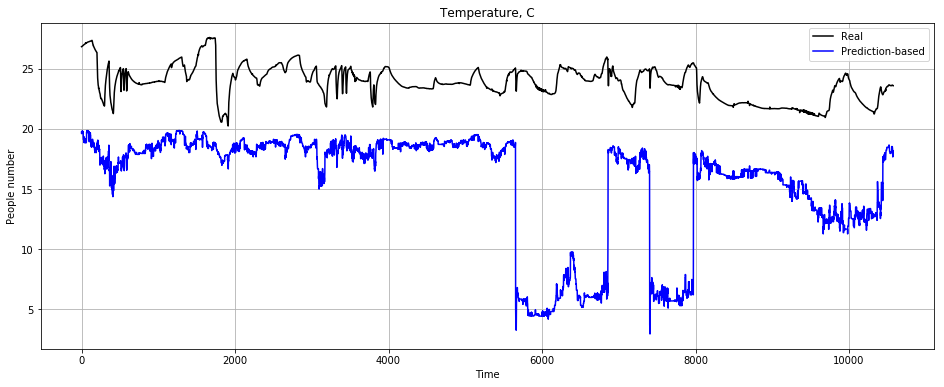

In [62]:
plt.figure(figsize=(16,6))
plt.plot(np.array(y_test), 'k', label='Real')
plt.plot(y_pred_gs.reshape(-1,1), 'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

## Support Vector Machine

In [60]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
svr_pred = svr.predict(x_test)

In [62]:
mean_squared_error(y_test, svr_pred)

0.005717584520273839

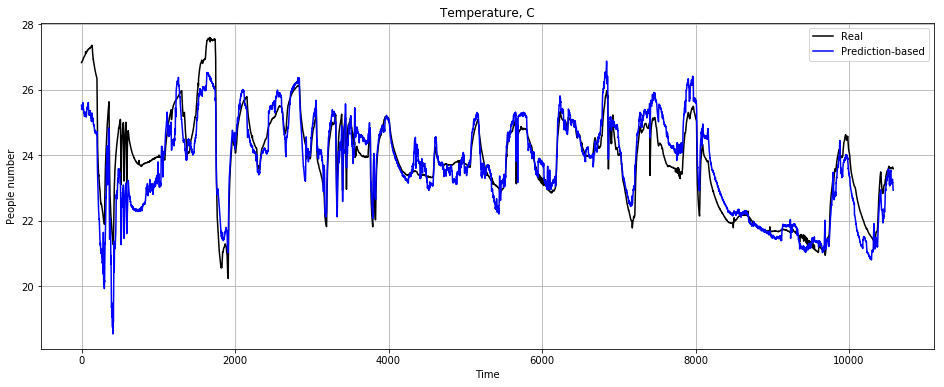

In [63]:
plt.figure(figsize=(16,6))
plt.plot(scale_y.inverse_transform(y_test.reshape(-1,1)), 'k', label='Real')
plt.plot(scale_y.inverse_transform(svr_pred.reshape(-1,1)), 'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

In [50]:
svr = SVR(kernel='rbf')
#'kernel':['rbf', 'sigmoid', 'linear']
params_svr = {'kernel':['rbf', 'poly']}
#params_svr = {'C': np.linspace(1,1.2,5)}
#'gamma': np.logspace(-3,0,3)}
#'epsilon':np.linspace(0.01,0.5,3)}
gs_svr = GridSearchCV(svr, param_grid = params_svr, scoring = 'r2', n_jobs=-1, verbose=2)
gs_svr.fit(x_train_scaled, y_train_scaled)
best_kernel_model = gs_svr.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=poly .....................................................
[CV] ............................................. kernel=rbf -   1.5s
[CV] kernel=poly .....................................................
[CV] ............................................. kernel=rbf -   2.3s
[CV] kernel=poly .....................................................
[CV] ............................................. kernel=rbf -   3.0s


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.1s remaining:    3.1s
Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()


KeyboardInterrupt: 

NameError: name 'best_kernel_model' is not defined

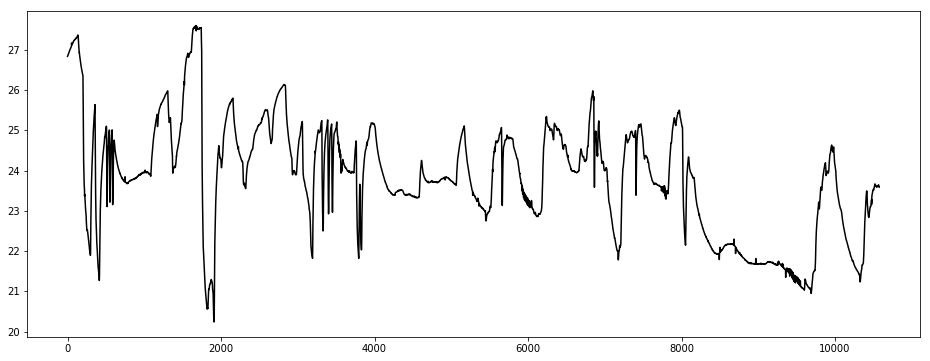

In [51]:
plt.figure(figsize=(16,6))
plt.plot(np.array(y_test), 'k', label='Real')
plt.plot(scale_y.inverse_transform(best_kernel_model.predict(scale_x.transform(x_test)).reshape(-1,1)),
         'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

## Sensitivity analysis

In [65]:
from SALib.analyze import sobol as sobol_analyzer
from SALib.analyze import morris as morris_analyzer

from SALib.sample import saltelli as saltelli_sampler
from SALib.sample import morris as morris_sampler

In [66]:
bounds = np.hstack((np.array(x_train.min()).reshape(-1,1),np.array(x_train.max()).reshape(-1,1)))

In [69]:
problem = {
    'num_vars': 22,
    'names': features_cols,
    'bounds': bounds,
    'groups': None
    }

In [76]:
x_sat = saltelli_sampler.sample(problem, 250)
y1, y2, y3 = np.zeros(x_sat.shape[0]), np.zeros(x_sat.shape[0]), np.zeros(x_sat.shape[0])

for i, xi in enumerate(x_sat):
    xi = xi.reshape(1, -1)
    y1[i] = cat.predict(xi)
    y2[i] = svr.predict(xi)
    
sobol_1 = sobol_analyzer.analyze(problem, y1, conf_level=0.97)
sobol_2 = sobol_analyzer.analyze(problem, y2, conf_level=0.97)

In [75]:
np.vstack((features_cols, sobol_1['ST'])).T

array([['CO2', '0.016475003594966526'],
       ['HUM', '0.4703401943149397'],
       ['PRES', '0.02352187185955042'],
       ['PVT_air_in_H', '0.014676769428254516'],
       ['PVT_air_in_T', '0.024044241037557028'],
       ['PVT_air_out_H', '0.06891481200144686'],
       ['PVT_air_out_T', '0.4347531742707859'],
       ['air_cond_state', '0.0035492248684153003'],
       ['air_in_speed', '0.00929727859782131'],
       ['air_in_val1_PV', '0.0062510946342530386'],
       ['air_in_val1_SP', '0.0006350825511616112'],
       ['air_in_val2_PV', '0.0037724654723728587'],
       ['air_in_val2_SP', '0.0065766549585822365'],
       ['air_out_val1_PV', '0.01647188011869047'],
       ['air_out_val1_SP', '0.006467163387453627'],
       ['air_out_val2_PV', '0.030975950104545086'],
       ['air_out_val2_SP', '0.00017720645507447733'],
       ['door_state', '0.001969115997847365'],
       ['people_number', '0.0057733386141337805'],
       ['radiator_val1', '0.0027894798328678724'],
       ['radiator_val

In [77]:
np.vstack((features_cols, sobol_2['ST'])).T

array([['CO2', '0.04190923432651383'],
       ['HUM', '0.37024031785520195'],
       ['PRES', '0.005219413872550958'],
       ['PVT_air_in_H', '0.0780833617250463'],
       ['PVT_air_in_T', '0.00512168151341331'],
       ['PVT_air_out_H', '0.09852340220342981'],
       ['PVT_air_out_T', '0.38182888637499973'],
       ['air_cond_state', '0.00022499893215741982'],
       ['air_in_speed', '0.0007584712735181177'],
       ['air_in_val1_PV', '0.00041049922970694654'],
       ['air_in_val1_SP', '0.002712618721820109'],
       ['air_in_val2_PV', '0.0009215407758274204'],
       ['air_in_val2_SP', '0.0008795225517486797'],
       ['air_out_val1_PV', '0.0024899808555189766'],
       ['air_out_val1_SP', '0.00023845104168775084'],
       ['air_out_val2_PV', '0.0011258453379069887'],
       ['air_out_val2_SP', '0.00021174645982798004'],
       ['door_state', '0.00018849943366721'],
       ['people_number', '0.002434005239390736'],
       ['radiator_val1', '0.0003810738260662652'],
       ['radiato

In [83]:
dataset

sensor,CO2,HUM,PRES,TC,PVT_air_in_H,PVT_air_in_T,PVT_air_out_H,PVT_air_out_T,air_cond_state,air_in_speed,...,air_in_val2_SP,air_out_val1_PV,air_out_val1_SP,air_out_val2_PV,air_out_val2_SP,door_state,people_number,radiator_val1,radiator_val2,radiator_val3
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-19 10:09:55,729.391615,5.871826,98954.46150,25.8850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:13:59,729.387182,5.584717,98945.59300,25.9350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:18:03,768.945500,5.853760,98941.42000,25.9950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:22:07,759.937465,5.674561,98942.96600,26.0500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:26:11,735.480175,5.661865,98946.35000,26.0400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:30:15,643.458160,5.029541,98943.12000,26.0300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:34:19,637.378922,5.126709,98945.20600,26.0225,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:38:23,631.314083,4.859619,98947.75025,26.0125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 10:42:27,594.325067,4.962158,98951.64750,25.9950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
